In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 
import glob

# Camera Calibration

In [3]:
images = glob.glob('camera_cal/calibration*.jpg')
images

['camera_cal/calibration5.jpg',
 'camera_cal/calibration4.jpg',
 'camera_cal/calibration6.jpg',
 'camera_cal/calibration7.jpg',
 'camera_cal/calibration3.jpg',
 'camera_cal/calibration2.jpg',
 'camera_cal/calibration1.jpg',
 'camera_cal/calibration20.jpg',
 'camera_cal/calibration19.jpg',
 'camera_cal/calibration18.jpg',
 'camera_cal/calibration15.jpg',
 'camera_cal/calibration14.jpg',
 'camera_cal/calibration16.jpg',
 'camera_cal/calibration17.jpg',
 'camera_cal/calibration13.jpg',
 'camera_cal/calibration12.jpg',
 'camera_cal/calibration10.jpg',
 'camera_cal/calibration11.jpg',
 'camera_cal/calibration9.jpg',
 'camera_cal/calibration8.jpg']

In [5]:
nx = 9
ny = 6

In [6]:
imgpoints = [] # 2D points in image plane
objpoints = [] # 3D points in real world space

In [7]:
objp = np.zeros((ny*nx, 3), np.float32)
objp.shape

(54, 3)

In [8]:
objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) # x, y coordinates
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [8., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [7., 1., 0.],
       [8., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [7., 2., 0.],
       [8., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [7., 3., 0.],
       [8., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [7., 4., 0.],
       [8., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5

In [9]:
for fname in images:
    img = cv2.imread(fname)
#     plt.imshow(img)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     plt.imshow(gray)
    
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

#         img = cv2.drawChessboardCorners(img, (8, 6), corners, ret)
#         plt.imshow(img)

In [10]:
gray.shape, gray.shape[::-1]

((720, 1280), (1280, 720))

In [11]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [12]:
ret

1.0298153371058978

In [13]:
mtx

array([[1.15777930e+03, 0.00000000e+00, 6.67111054e+02],
       [0.00000000e+00, 1.15282291e+03, 3.86128938e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [14]:
dist

array([[-0.24688775, -0.02373133, -0.00109842,  0.00035108, -0.00258571]])

In [31]:
img = mpimg.imread('camera_cal/calibration1.jpg')

In [56]:
img.shape

(720, 1280, 3)

In [32]:
dst = cv2.undistort(img, mtx, dist, None, mtx)

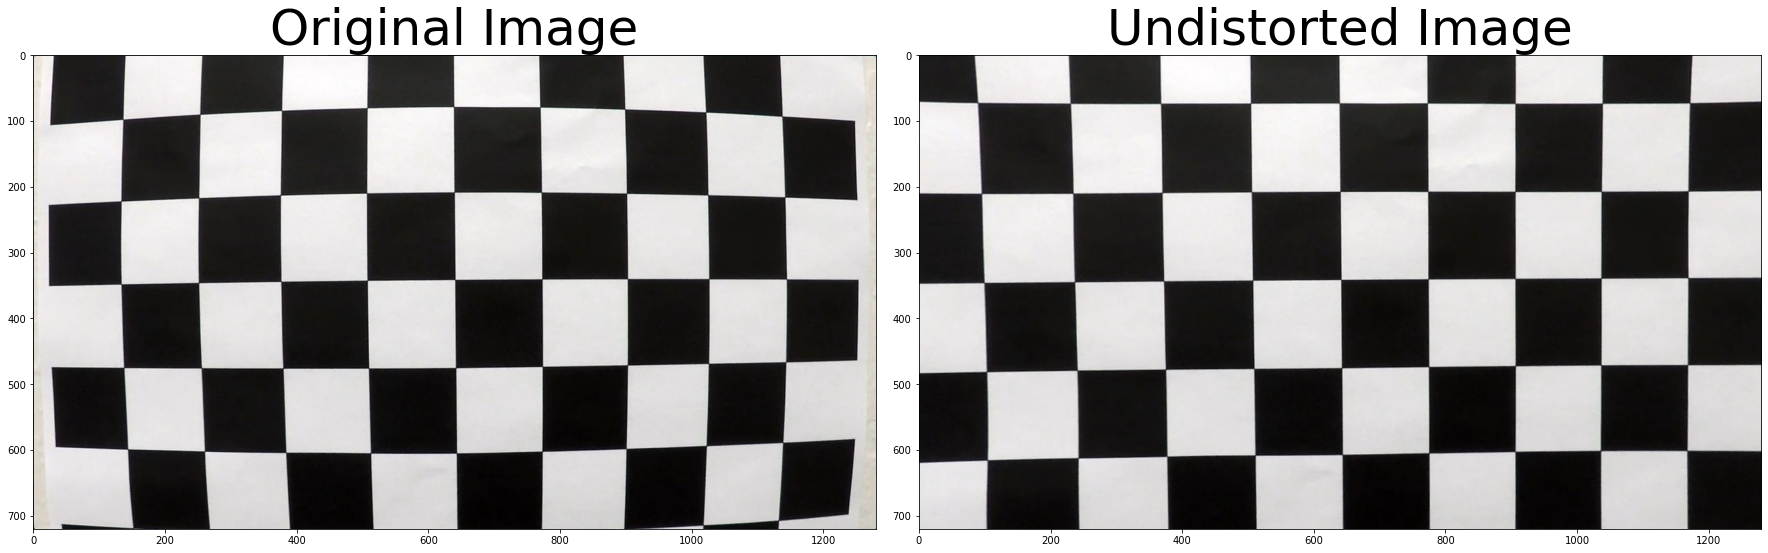

In [33]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Distortion Correction

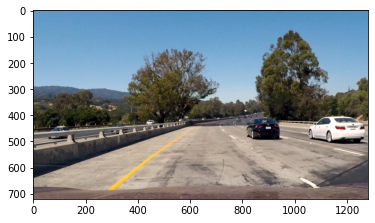

In [61]:
img = mpimg.imread('test_images/test1.jpg')
plt.imshow(img)

In [62]:
dst_img = cv2.undistort(img, mtx, dist, None, mtx)

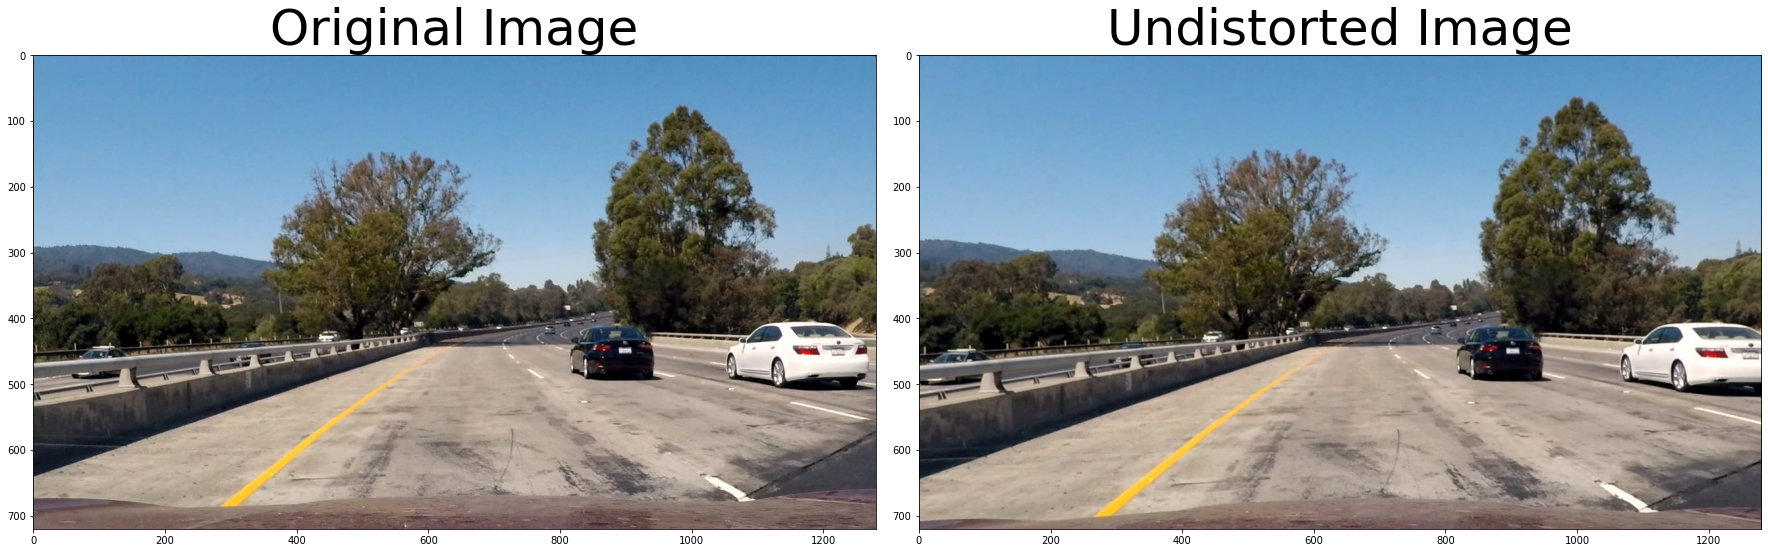

In [63]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(dst_img)
ax2.set_title('Undistorted Image', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Color and Gradient Transform

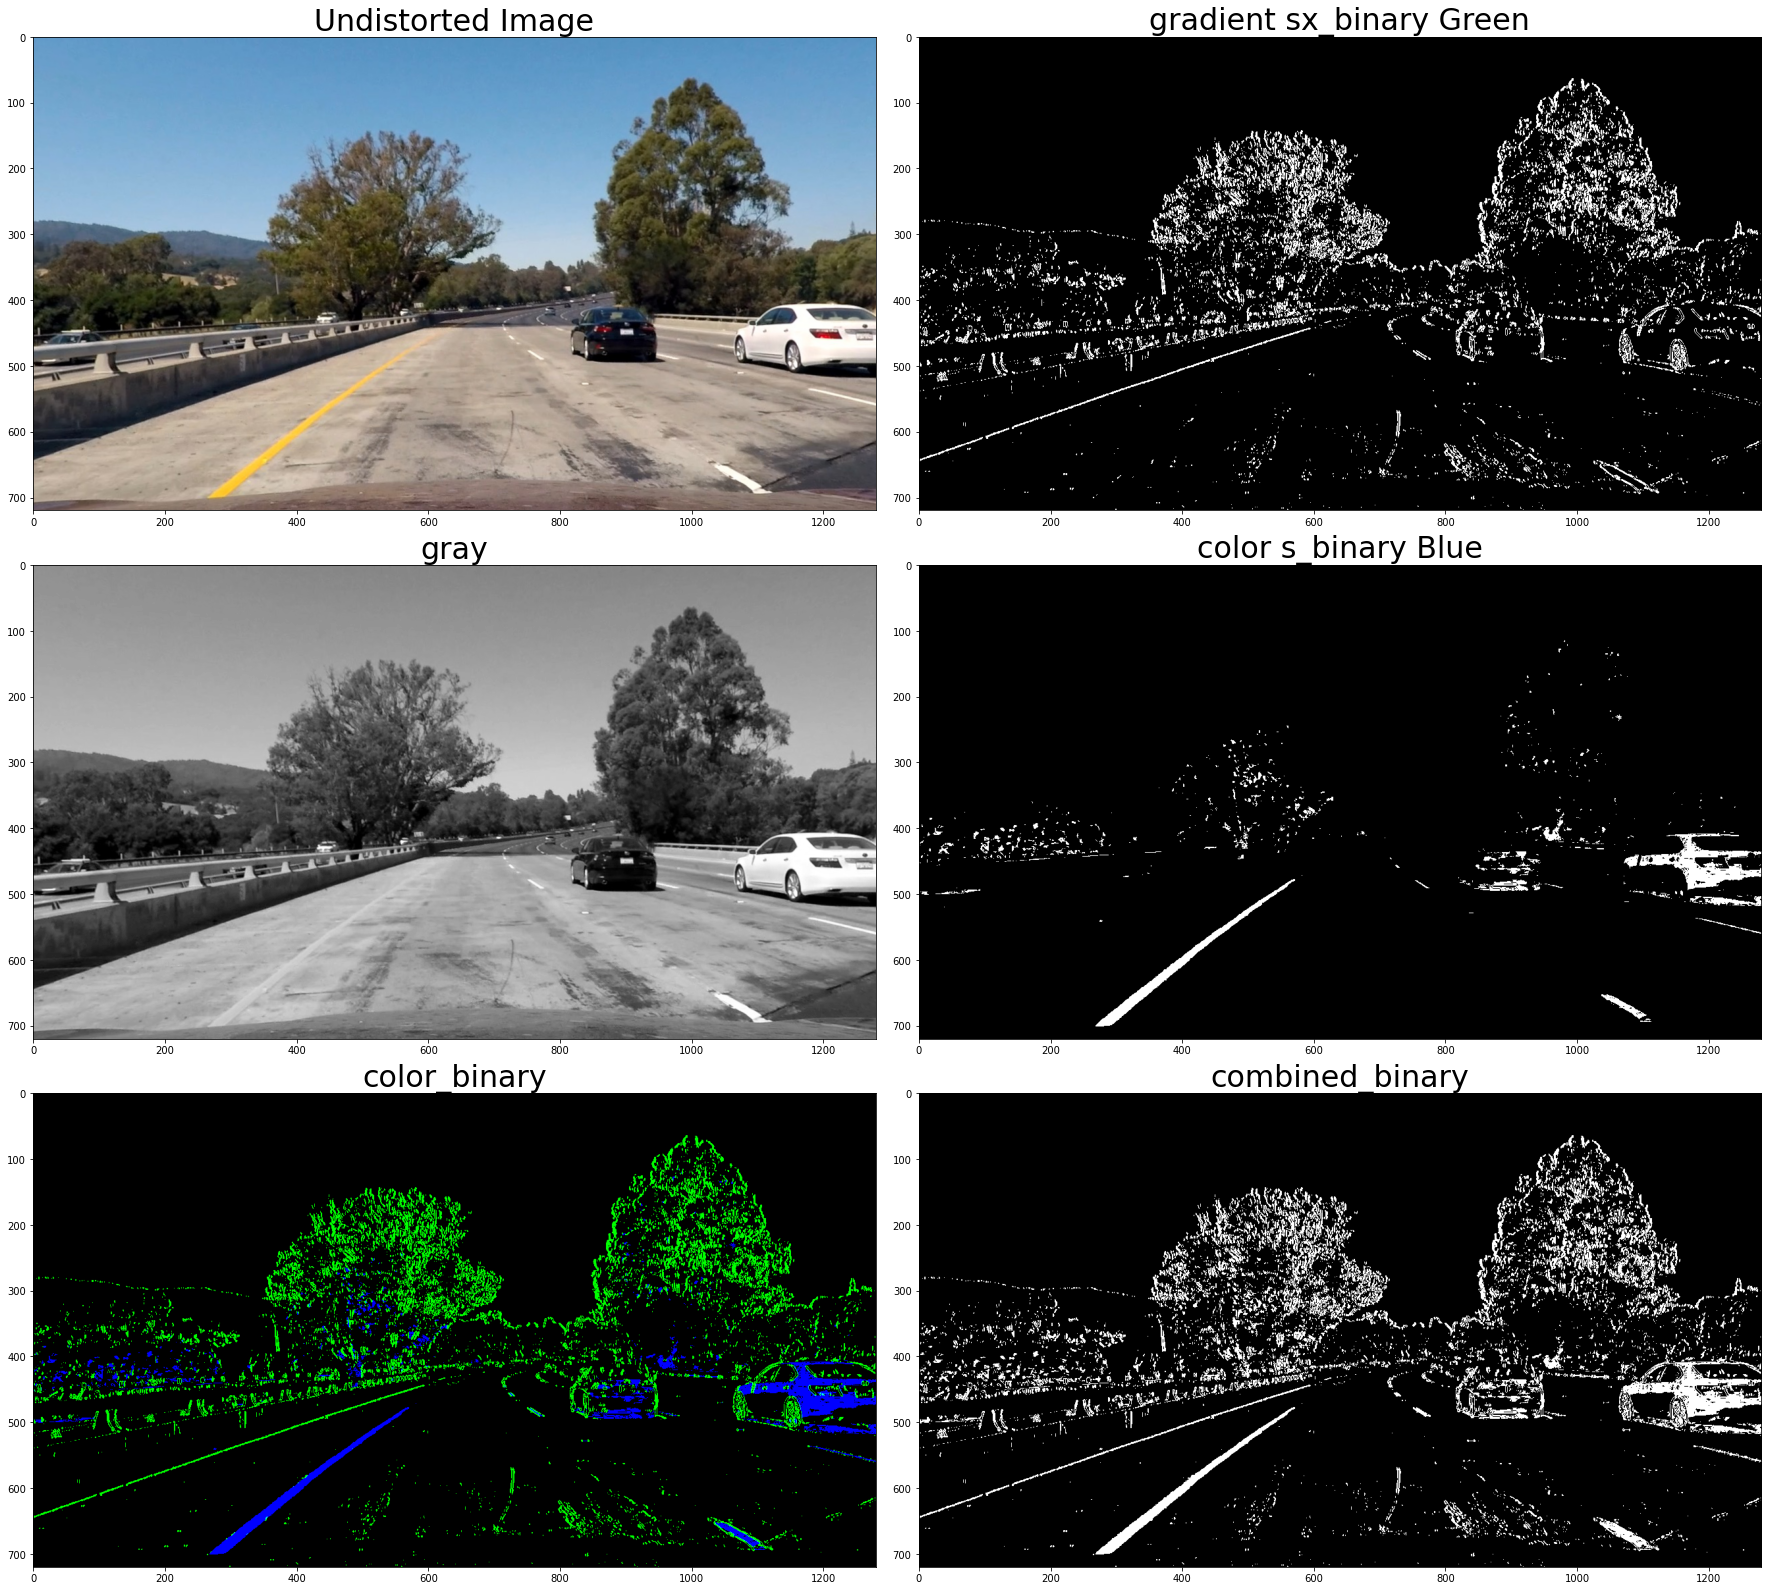

In [64]:
# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

    
    
    # Grayscale image
    # NOTE: we already saw that standard grayscaling lost color information for the lane lines
    # Explore gradients in other colors spaces / color channels to see what might work better
    
    # Sobel x    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    
#     sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x

    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sx_binary = np.zeros_like(scaled_sobel)
    sx_binary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    
    
    # Stack each channel: black in R channel, sxbinary in G channel, s_binary in B channel
    color_binary = np.dstack(( np.zeros_like(sx_binary), sx_binary, s_binary)) * 255
        
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sx_binary)
    combined_binary[(s_binary == 1) | (sx_binary == 1)] = 1

    return gray, sx_binary, s_binary, combined_binary, color_binary 
    

# use undistorted image  
gray, sx_binary, s_binary, combined_binary, color_binary = pipeline(dst_img)


f, axs = plt.subplots(3, 2, figsize=(24, 24))
f.tight_layout()

axs[0, 0].imshow(dst_img)
axs[0, 0].set_title('Undistorted Image', fontsize=30)

axs[0, 1].imshow(sx_binary, cmap='gray')
axs[0, 1].set_title('gradient sx_binary Green', fontsize=30)

axs[1, 0].imshow(gray, cmap='gray')
axs[1, 0].set_title('gray', fontsize=30)

axs[1, 1].imshow(s_binary, cmap='gray')
axs[1, 1].set_title('color s_binary Blue', fontsize=30)

axs[2, 1].imshow(combined_binary, cmap='gray')
axs[2, 1].set_title('combined_binary', fontsize=30)

axs[2, 0].imshow(color_binary)
axs[2, 0].set_title('color_binary', fontsize=30)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Perspective Transform

In [72]:
%matplotlib qt
plt.imshow(combined_binary, cmap='gray')

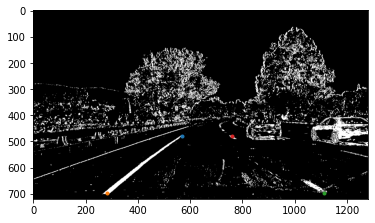

In [73]:
%matplotlib inline
plt.imshow(combined_binary, cmap='gray')
plt.plot(567, 479, '.')
plt.plot(281, 697, '.')
plt.plot(1112, 697, '.')
plt.plot(759, 479, '.')

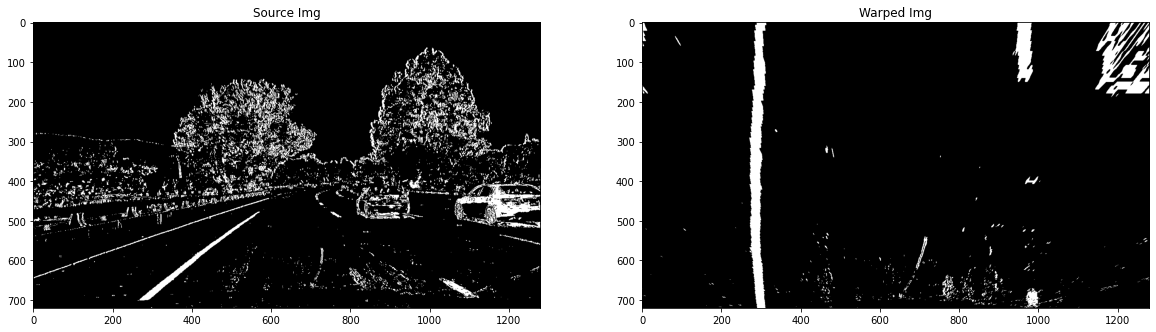

In [119]:
def warp(img):
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32([
        [567, 479],
        [281, 697],
        [1112, 697],
        [759, 479]        
    ])
    
    dst = np.float32([
        [300, 0],
        [300, 720],
        [980, 720],
        [980, 0]                      
    ])

    
    M = cv2.getPerspectiveTransform(src, dst)    
    M_inv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, M_inv


warped_img, M_inv = warp(combined_binary)

%matplotlib inline
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Source Img')
ax1.imshow(combined_binary, cmap='gray')
ax2.set_title('Warped Img')
ax2.imshow(warped_img, cmap='gray')

# Detect Lane Pixels and Find the Lane

In [120]:
warped_img.shape

(720, 1280)

In [121]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/(980 - 300) # meters per pixel in x dimension

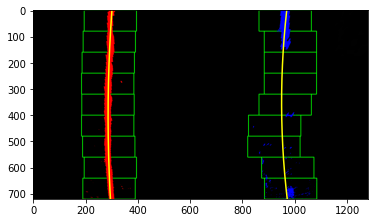

In [122]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = int(binary_warped.shape[0]//nwindows)
    
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        
        ### TO-DO: Find the four below boundaries of the window ###
        # win_xleft_low = 0  # Update this
        # win_xleft_high = 0  # Update this
        # win_xright_low = 0  # Update this
        # win_xright_high = 0  # Update this
        win_xleft_low = int(np.max([leftx_current - margin, 0]))
        win_xleft_high = int(np.min([leftx_current + margin, binary_warped.shape[1]]))
        win_xright_low = int(np.max([rightx_current - margin, 0]))
        win_xright_high = int(np.min([rightx_current + margin, binary_warped.shape[1]]))
        
#         print(window, (win_xleft_low, win_y_low), (win_xleft_high, win_y_high), (0, 255, 0), 2)
    
        cv2.rectangle(out_img, (win_xleft_low, win_y_low), (win_xleft_high, win_y_high), (0, 255, 0), 2)
        cv2.rectangle(out_img, (win_xright_low, win_y_low), (win_xright_high, win_y_high), (0, 255, 0), 2)

        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        # good_left_inds = None
        # good_right_inds = None
        
        good_left_inds = []
        good_right_inds = []
        for i in range(len(nonzeroy)):    
            y = nonzeroy[i]
            x = nonzerox[i]
            
            if (win_y_low <= y) & (y <= win_y_high):
                if (win_xleft_low <= x) & (x <= win_xleft_high):
                    good_left_inds.append([y, x])
                if (win_xright_low <= x) & (x <= win_xright_high):            
                    good_right_inds.append([y, x])  
                    
        # Append these indices to the lists
#         left_lane_inds.append(good_left_inds)
#         right_lane_inds.append(good_right_inds)                    
        if len(good_left_inds) > 0:
            left_lane_inds.append(good_left_inds)
        if len(good_right_inds) > 0:
            right_lane_inds.append(good_right_inds)
                        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        # pass # Remove this when you add your function
        if len(good_left_inds) > minpix:
            leftx_current = np.mean( np.array(good_left_inds)[:, 1:2] )

        if len(good_right_inds) > minpix:
            rightx_current = np.mean( np.array(good_right_inds)[:, 1:2] )            

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        # pass
        print('Error 1 out')

    # Extract left and right line pixel positions
    # leftx = nonzerox[left_lane_inds]
    # lefty = nonzeroy[left_lane_inds] 
    # rightx = nonzerox[right_lane_inds]
    # righty = nonzeroy[right_lane_inds]

    leftx = left_lane_inds[:, 1]
    lefty = left_lane_inds[:, 0]
    
    rightx = right_lane_inds[:, 1]
    righty = right_lane_inds[:, 0]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped, ym_per_pix, xm_per_pix):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    # left_fit = None
    # right_fit = None
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
#     print('left_fit', left_fit)
#     print('right_fit', right_fit)


    # for curvature calculation
    left_fit_cr = np.polyfit(lefty * ym_per_pix, leftx * xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty * ym_per_pix, rightx * xm_per_pix, 2)


    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
           

    return lefty, left_fit_cr, righty, right_fit_cr, ploty, left_fitx, right_fitx, out_img


lefty, left_fit_cr, righty, right_fit_cr, ploty, left_fitx, right_fitx, out_warped_img = fit_polynomial(warped_img, ym_per_pix, xm_per_pix)

plt.imshow(out_warped_img, cmap='gray')

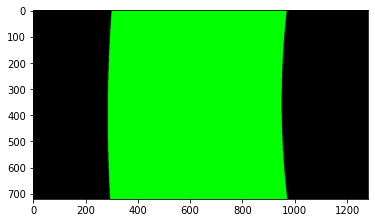

In [123]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped_img).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

plt.imshow(color_warp, cmap='gray')

# Determine the Curvature

In [124]:
def measure_curvature_real():
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
#     # Define conversions in x and y from pixels space to meters
#     ym_per_pix = 30/720 # meters per pixel in y dimension
#     xm_per_pix = 3.7/(980 - 300) # meters per pixel in x dimension
    
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    lefty_eval = np.max(lefty) * ym_per_pix
    righty_eval = np.max(righty) * ym_per_pix    
    
    ##### TO-DO: Implement the calculation of R_curve (radius of curvature) #####
#     left_curverad = 0  ## Implement the calculation of the left line here
#     right_curverad = 0  ## Implement the calculation of the right line here
    
    A = left_fit_cr[0]
    B = left_fit_cr[1]
    left_curverad = np.power( 1 + np.power(2 * A * lefty_eval + B, 2), 3.0/2) / np.abs( 2 * A )
    
    A = right_fit_cr[0]
    B = right_fit_cr[1]
    right_curverad = np.power( 1 + np.power(2 * A * righty_eval + B, 2), 3.0/2) / np.abs( 2 * A )    
 
    return left_curverad, right_curverad


# Calculate the radius of curvature in meters for both lane lines
# correct answer is 1km
left_curverad, right_curverad = measure_curvature_real()

print(left_curverad, 'm', right_curverad, 'm')

1771.6261898011335 m 1009.6662331566926 m


# Warp the detected lane back onto the original image

In [125]:
# Warp the blank back to original image space using inverse perspective matrix (Minv)
new_warp = cv2.warpPerspective(color_warp, M_inv, (color_warp.shape[1], color_warp.shape[0])) 

# Combine the result with the original image
result = cv2.addWeighted(dst_img, 1, new_warp, 0.3, 0)

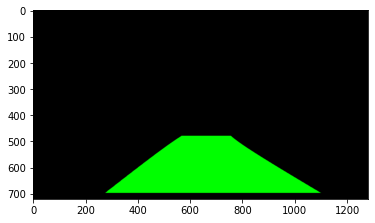

In [126]:
plt.imshow(new_warp)

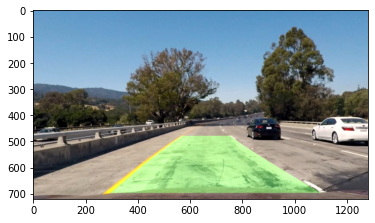

In [127]:
plt.imshow(result)

# Video 

In [128]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [134]:
def advanced_land_finding(img):    
    dst_img = cv2.undistort(img, mtx, dist, None, mtx)

    
    def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
        img = np.copy(img)

        # Convert to HLS color space and separate the V channel
        hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        l_channel = hls[:,:,1]
        s_channel = hls[:,:,2]

        # Threshold color channel
        s_binary = np.zeros_like(s_channel)
        s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1



        # Grayscale image
        # NOTE: we already saw that standard grayscaling lost color information for the lane lines
        # Explore gradients in other colors spaces / color channels to see what might work better

        # Sobel x    
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x

    #     sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x

        abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
        scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

        # Threshold x gradient
        sx_binary = np.zeros_like(scaled_sobel)
        sx_binary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1



        # Stack each channel: black in R channel, sxbinary in G channel, s_binary in B channel
        color_binary = np.dstack(( np.zeros_like(sx_binary), sx_binary, s_binary)) * 255

        # Combine the two binary thresholds
        combined_binary = np.zeros_like(sx_binary)
        combined_binary[(s_binary == 1) | (sx_binary == 1)] = 1

        return gray, sx_binary, s_binary, combined_binary, color_binary 


    # use undistorted image  
    gray, sx_binary, s_binary, combined_binary, color_binary = pipeline(dst_img)
    
    

    def warp(img):
        img_size = (img.shape[1], img.shape[0])

        src = np.float32([
            [567, 479],
            [281, 697],
            [1112, 697],
            [759, 479]        
        ])

        dst = np.float32([
            [300, 0],
            [300, 720],
            [980, 720],
            [980, 0]                      
        ])


        M = cv2.getPerspectiveTransform(src, dst)    
        M_inv = cv2.getPerspectiveTransform(dst, src)

        warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

        return warped, M_inv


    warped_img, M_inv = warp(combined_binary)    
    
    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/(980 - 300) # meters per pixel in x dimension 
    

    def find_lane_pixels(binary_warped):
        # Take a histogram of the bottom half of the image
        histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)

        # Create an output image to draw on and visualize the result
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))

        # Find the peak of the left and right halves of the histogram
        # These will be the starting point for the left and right lines
        midpoint = int(histogram.shape[0]//2)
        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint

        # HYPERPARAMETERS
        # Choose the number of sliding windows
        nwindows = 9
        # Set the width of the windows +/- margin
        margin = 100
        # Set minimum number of pixels found to recenter window
        minpix = 50

        # Set height of windows - based on nwindows above and image shape
        window_height = int(binary_warped.shape[0]//nwindows)

        # Identify the x and y positions of all nonzero pixels in the image
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])

        # Current positions to be updated later for each window in nwindows
        leftx_current = leftx_base
        rightx_current = rightx_base

        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []

        # Step through the windows one by one
        for window in range(nwindows):
            # Identify window boundaries in x and y (and right and left)
            win_y_low = binary_warped.shape[0] - (window+1)*window_height
            win_y_high = binary_warped.shape[0] - window*window_height

            ### TO-DO: Find the four below boundaries of the window ###
            # win_xleft_low = 0  # Update this
            # win_xleft_high = 0  # Update this
            # win_xright_low = 0  # Update this
            # win_xright_high = 0  # Update this
            win_xleft_low = int(np.max([leftx_current - margin, 0]))
            win_xleft_high = int(np.min([leftx_current + margin, binary_warped.shape[1]]))
            win_xright_low = int(np.max([rightx_current - margin, 0]))
            win_xright_high = int(np.min([rightx_current + margin, binary_warped.shape[1]]))

    #         print(window, (win_xleft_low, win_y_low), (win_xleft_high, win_y_high), (0, 255, 0), 2)

            cv2.rectangle(out_img, (win_xleft_low, win_y_low), (win_xleft_high, win_y_high), (0, 255, 0), 2)
            cv2.rectangle(out_img, (win_xright_low, win_y_low), (win_xright_high, win_y_high), (0, 255, 0), 2)

            ### TO-DO: Identify the nonzero pixels in x and y within the window ###
            # good_left_inds = None
            # good_right_inds = None

            good_left_inds = []
            good_right_inds = []
            for i in range(len(nonzeroy)):    
                y = nonzeroy[i]
                x = nonzerox[i]

                if (win_y_low <= y) & (y <= win_y_high):
                    if (win_xleft_low <= x) & (x <= win_xleft_high):
                        good_left_inds.append([y, x])
                    if (win_xright_low <= x) & (x <= win_xright_high):            
                        good_right_inds.append([y, x])  

            # Append these indices to the lists
    #         left_lane_inds.append(good_left_inds)
    #         right_lane_inds.append(good_right_inds)                    
            if len(good_left_inds) > 0:
                left_lane_inds.append(good_left_inds)
            if len(good_right_inds) > 0:
                right_lane_inds.append(good_right_inds)

            ### TO-DO: If you found > minpix pixels, recenter next window ###
            ### (`right` or `leftx_current`) on their mean position ###
            # pass # Remove this when you add your function
            if len(good_left_inds) > minpix:
                leftx_current = np.mean( np.array(good_left_inds)[:, 1:2] )

            if len(good_right_inds) > minpix:
                rightx_current = np.mean( np.array(good_right_inds)[:, 1:2] )            

        # Concatenate the arrays of indices (previously was a list of lists of pixels)
        try:
            left_lane_inds = np.concatenate(left_lane_inds)
            right_lane_inds = np.concatenate(right_lane_inds)
        except ValueError:
            # Avoids an error if the above is not implemented fully
            # pass
            print('Error 1 out')

        # Extract left and right line pixel positions
        # leftx = nonzerox[left_lane_inds]
        # lefty = nonzeroy[left_lane_inds] 
        # rightx = nonzerox[right_lane_inds]
        # righty = nonzeroy[right_lane_inds]

        leftx = left_lane_inds[:, 1]
        lefty = left_lane_inds[:, 0]

        rightx = right_lane_inds[:, 1]
        righty = right_lane_inds[:, 0]

        return leftx, lefty, rightx, righty, out_img


    def fit_polynomial(binary_warped, ym_per_pix, xm_per_pix):
        # Find our lane pixels first
        leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

        ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
        # left_fit = None
        # right_fit = None
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
    #     print('left_fit', left_fit)
    #     print('right_fit', right_fit)


        # for curvature calculation
        left_fit_cr = np.polyfit(lefty * ym_per_pix, leftx * xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty * ym_per_pix, rightx * xm_per_pix, 2)


        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        try:
            left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
            right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        except TypeError:
            # Avoids an error if `left` and `right_fit` are still none or incorrect
            print('The function failed to fit a line!')
            left_fitx = 1*ploty**2 + 1*ploty
            right_fitx = 1*ploty**2 + 1*ploty

        ## Visualization ##
        # Colors in the left and right lane regions
        out_img[lefty, leftx] = [255, 0, 0]
        out_img[righty, rightx] = [0, 0, 255]

        # Plots the left and right polynomials on the lane lines
#         plt.plot(left_fitx, ploty, color='yellow')
#         plt.plot(right_fitx, ploty, color='yellow')


        return lefty, left_fit_cr, righty, right_fit_cr, ploty, left_fitx, right_fitx, out_img


    lefty, left_fit_cr, righty, right_fit_cr, ploty, left_fitx, right_fitx, out_warped_img = fit_polynomial(warped_img, ym_per_pix, xm_per_pix)
    

    
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))    
    
    
    

    def measure_curvature_real():
        '''
        Calculates the curvature of polynomial functions in meters.
        '''
    #     # Define conversions in x and y from pixels space to meters
    #     ym_per_pix = 30/720 # meters per pixel in y dimension
    #     xm_per_pix = 3.7/(980 - 300) # meters per pixel in x dimension


        # Define y-value where we want radius of curvature
        # We'll choose the maximum y-value, corresponding to the bottom of the image
        lefty_eval = np.max(lefty) * ym_per_pix
        righty_eval = np.max(righty) * ym_per_pix    

        ##### TO-DO: Implement the calculation of R_curve (radius of curvature) #####
    #     left_curverad = 0  ## Implement the calculation of the left line here
    #     right_curverad = 0  ## Implement the calculation of the right line here

        A = left_fit_cr[0]
        B = left_fit_cr[1]
        left_curverad = np.power( 1 + np.power(2 * A * lefty_eval + B, 2), 3.0/2) / np.abs( 2 * A )

        A = right_fit_cr[0]
        B = right_fit_cr[1]
        right_curverad = np.power( 1 + np.power(2 * A * righty_eval + B, 2), 3.0/2) / np.abs( 2 * A )    

        return left_curverad, right_curverad


    # Calculate the radius of curvature in meters for both lane lines
    # correct answer is 1km
    left_curverad, right_curverad = measure_curvature_real()

#     print(left_curverad, 'm', right_curverad, 'm')    
    
    
    
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    new_warp = cv2.warpPerspective(color_warp, M_inv, (color_warp.shape[1], color_warp.shape[0])) 

    # Combine the result with the original image
    result = cv2.addWeighted(dst_img, 1, new_warp, 0.3, 0)   
    
    return result

In [141]:
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds

video_name = "project_video"
# video_name = "challenge_video" 
# video_name = "harder_challenge_video" 

output_video_name = video_name + "_output"

clip1 = VideoFileClip( "{}.mp4".format(video_name) ).subclip(0,5)
# clip1 = VideoFileClip( "{}.mp4".format(video_name) )

white_clip = clip1.fl_image(advanced_land_finding) #NOTE: this function expects color images!!

white_output = 'output_images/{}.mp4'.format(output_video_name)
%time white_clip.write_videofile(white_output, audio=False)


                                                                                                                 
t:  12%|███████▊                                                         | 15/125 [01:49<01:03,  1.73it/s, now=None]
                                                                                                                 
t:  12%|███████▊                                                         | 15/125 [01:49<01:03,  1.73it/s, now=None]

Moviepy - Building video output_images/project_video_output.mp4.
Moviepy - Writing video output_images/project_video_output.mp4



                                                                                                                    
                                                                                                                 
t:  12%|███████▊                                                         | 15/125 [02:26<01:03,  1.73it/s, now=None]
                                                                                                                 
t:  12%|███████▊                                                         | 15/125 [02:26<01:03,  1.73it/s, now=None]

Moviepy - Done !
Moviepy - video ready output_images/project_video_output.mp4
CPU times: user 38.5 s, sys: 2.06 s, total: 40.6 s
Wall time: 37 s


In [142]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))